In [1]:
# Importing libraries i'll need.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Upload DataFrame

df = pd.read_csv('Data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
# Cheking how many NaN values has our DataFrame.

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

DataFrame doesn't have Nan Values.

In [4]:
# I'm using method "get_dummies" to convert string in integer in the following columns.

df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [5]:
# Shuffle the DataFrame

df = df.sample(frac=1)
df

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
852,46,35.5,0,42111.66,0,1,0,0,0
934,32,37.2,2,4673.39,1,0,0,1,0
920,62,25.0,0,13451.12,0,0,0,0,1
191,36,26.2,0,4883.87,0,0,0,0,1
402,64,33.0,0,14692.67,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
67,40,26.3,1,6389.38,1,0,1,0,0
526,19,30.6,2,24059.68,0,0,1,0,0
991,38,27.8,2,7144.86,0,0,0,0,0
749,28,30.9,0,3062.51,1,0,1,0,0


In [6]:
# Convert Dataframe into numpy arrays

X = df.drop(['expenses'], axis=1).values
y = df['expenses'].values

In [7]:
# Import from sklearn functions we need and split our data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# From sklearn import function for LinearRegression model

from sklearn.linear_model import LinearRegression

In [9]:
# Creat and train our LinearRegression model

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [10]:
# Making prediction

yhat = linear.predict(X_test)
yhat

array([  529.62246383, 13979.12109747, 10026.45562397, -1316.98832937,
         810.60495074,  5502.17031311,  7365.64957491,  4673.21702821,
       12006.07660072, 15010.31194093,  3716.95721709,  3156.8664405 ,
       16246.66656383,  8244.55789403,  8283.82542883,  7570.25606488,
        9596.98116319, 34777.96120765,  3414.78887503,  4103.7072229 ,
        7166.52932298,  6910.56879847, 10829.1554694 , 14135.68349199,
       26245.60166046,  1275.31346119,  5251.85515825, 27883.39716701,
       32197.21534504,  2494.4779456 , 11285.03430188, 27718.59633471,
        7718.99476913,  4227.08967243, 37062.58436117,  5445.05560026,
        5651.72512417,  8087.01524161, 29330.10402157,  3414.73258392,
       11604.53631309,  2489.95432221, 29569.66098215,  5847.38680035,
        7683.95408179, 15157.03077121,  3639.98079406,  1100.23768595,
       26305.02643802,  6452.86100317,  6961.381574  , 10706.51263871,
       12173.06388729, 13209.1766615 ,  6602.87196115,  3056.27893982,
      

I'll see the accuracy of the model. To interpret errors I'll use the following models
of errors MAE (mean absolute error) and MSE (Mean Squared Error)

In [11]:
# Import function repsonsible for these errors.

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
# We have pass to these functions the array with the predicted values and the real ones.

print(mean_absolute_error(yhat, y_test))
print(mean_squared_error(yhat, y_test))

4177.003066471141
38162192.24696084


Now I'm going to visualize the data. I'll train our model on the most correlated column with the target column.

In [13]:
df.corrwith(df['expenses'])

age                 0.299008
bmi                 0.198576
children            0.067998
expenses            1.000000
sex_male            0.057292
smoker_yes          0.787251
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
dtype: float64

The most correlated column is "smoker_yes".

In [14]:
X = df['smoker_yes'].values
y = df['expenses'].values
X

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [15]:
# We can't feed such a vector to sklearn algorithms as X array.
# We must reshape it.

X.reshape(-1, 1)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [16]:
X = X.reshape(-1, 1)

In [17]:
linear.fit(X, y)

LinearRegression()

In [18]:
# Now I build our plot.

X_plot = np.linspace(X.min(), X.max(), 100, endpoint=True)
yhat = linear.predict(X_plot.reshape(-1, 1))

<function matplotlib.pyplot.show(close=None, block=None)>

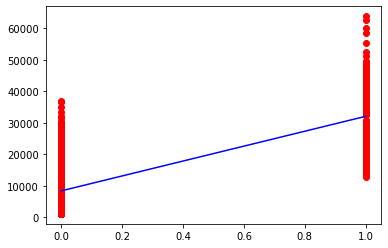

In [19]:
plt.scatter(X[:, 0], y, c='red')
plt.plot(X_plot, yhat, c='blue')
plt.show

How do we obtainet this plot?

In [20]:
# sklearn estimators saves the paramenters of the model.
# coef_ stores the weight of the parametersm as you se it is positive, so the function is growing.

linear.coef_

array([23615.96352155])

In [21]:
# intecest_ save the free coeficitent

linear.intercept_

8434.268449248108

# FEATURE SELECTION FOR LINEAR REGRESIION

In [22]:
#  Kydavra has 3 selectors that are very usefull for selecting the columns in the regression problems.

from kydavra import PValueSelector

In [23]:
pvalue = PValueSelector()
selected_cols = pvalue.select(df, 'expenses')

In [24]:
selected_cols

['age',
 'bmi',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [25]:
# I use the selected columns to train on.

X = df[selected_cols].values
y = df['expenses'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
linear.fit(X_train, y_train)
yhat = linear.predict(X_test)
mean_squared_error(yhat, y_test)

36110662.519420736

In [28]:
mean_absolute_error(yhat, y_test)

4176.606611262054

Next we will look at the linear version of a classification algorithm.

In [29]:
# Logistic Regression is just the linear regression with the sigmoid function at the end.

from math import e
sigmoid = lambda y : 1 / (1 + e**(-y))

In [30]:
for value in np.linspace(-10, 10, 20):
    print(f"{value} - {sigmoid(value)}")

-10.0 - 4.539786870243442e-05
-8.947368421052632 - 0.00013006210489596826
-7.894736842105264 - 0.00037256111270949304
-6.842105263157895 - 0.0010667138266594568
-5.7894736842105265 - 0.0030502595145393665
-4.736842105263158 - 0.008690105581568575
-3.6842105263157894 - 0.02450158977075337
-2.6315789473684212 - 0.06713349888458207
-1.578947368421053 - 0.17094461198713198
-0.526315789473685 - 0.37137658078432684
0.5263157894736832 - 0.6286234192156727
1.5789473684210513 - 0.8290553880128678
2.6315789473684212 - 0.9328665011154179
3.6842105263157894 - 0.9754984102292465
4.7368421052631575 - 0.9913098944184313
5.789473684210526 - 0.9969497404854607
6.842105263157894 - 0.9989332861733405
7.894736842105264 - 0.9996274388872904
8.94736842105263 - 0.9998699378951041
10.0 - 0.9999546021312976


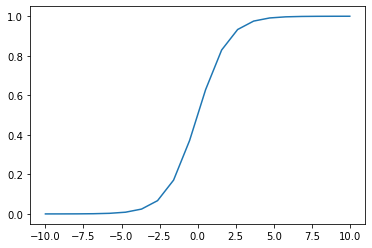

In [31]:
# Now let's plot it.

X = np.linspace(-10, 10, 20)
plt.plot(X, sigmoid(X))

This is out function, as we can see from the interval -10 to -4, adn from 4 to 10 it almost doesnt change itself. let's look it close.

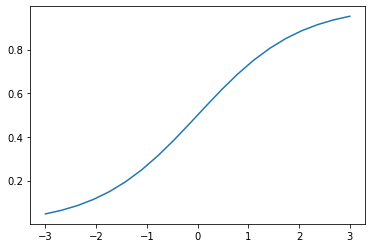

In [32]:
X = np.linspace(-3, 3, 20)
plt.plot(X, sigmoid(X))

That's why usually we normalize data before trainig a logistic regression on it.

In [33]:
# Upload new DataFrame

df = pd.read_csv('Data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
# When workign with linear models we have to convert categorical value to dummie variables.

df = pd.get_dummies(df, columns=['Pregnancies', 'SkinThickness', 'Insulin'], drop_first=True)
df

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_1,Pregnancies_2,Pregnancies_3,Pregnancies_4,...,Insulin_495,Insulin_510,Insulin_540,Insulin_543,Insulin_545,Insulin_579,Insulin_600,Insulin_680,Insulin_744,Insulin_846
0,148,72,33.6,0.627,50,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85,66,26.6,0.351,31,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,183,64,23.3,0.672,32,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89,66,28.1,0.167,21,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,137,40,43.1,2.288,33,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,101,76,32.9,0.171,63,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
764,122,70,36.8,0.340,27,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
765,121,72,26.2,0.245,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
766,126,60,30.1,0.349,47,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# From sklearn import function we will need.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [36]:
# Now let's shuffle the data and standartize the data.

df = df.sample(frac=1)

In [37]:
X = df.drop(['Outcome'], axis=1).values
y = df['Outcome'].values

In [38]:
# Split our data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
std = StandardScaler()
X_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [40]:
logit = LogisticRegression()
logit.fit(X_scaled, y_train)
yhat = logit.predict(X_test_scaled)
yhat

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [41]:
# Now I'll see the accuracy of the model.

from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat)

0.640625

In [42]:
from kydavra import PointBiserialCorrSelector
selector = PointBiserialCorrSelector(last_level=3)
selected_cols = selector.select(df, 'Outcome')

In [43]:
selected_cols

['Glucose',
 'BMI',
 'Age',
 'DiabetesPedigreeFunction',
 'Pregnancies_1',
 'Pregnancies_2',
 'Pregnancies_7',
 'Pregnancies_8',
 'Pregnancies_9']

In [44]:
X = df[selected_cols].values
y = df['Outcome'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
logit.fit(X_train, y_train)

LogisticRegression()

In [47]:
yhat = logit.predict(X_test)

In [48]:
accuracy_score(yhat, y_test)

0.7760416666666666

In [49]:
# I'll use 2 selected columns to create the model.

X = df[['Glucose', 'BMI']].values
y = df['Outcome'].values

In [50]:
# We will create a function that we will use many times to see the classification.

def visualise_clf(model, X, y, proba, cmap='winter'):
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c= y, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                            level = np.arange(n_classes + 1) - 0.5,
                            cmap = cmap, clim=(y.min(), y.max()),
                            zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

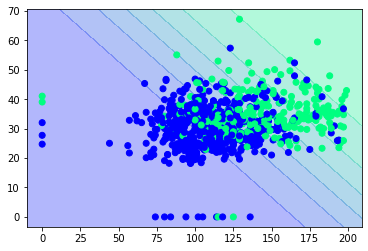

In [51]:
visualise_clf(logit, X, y, True)

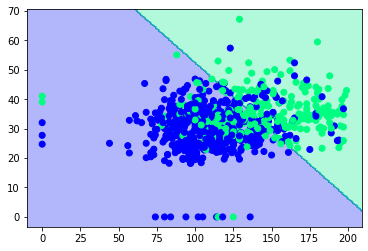

In [52]:
visualise_clf(logit, X, y, False)

In [53]:
# Also after we fit a logist model we can see it's weight and intercept.
logit.coef_

array([[0.03516872, 0.0763209 ]])

In [54]:
logit.intercept_

array([-7.51516287])

In [55]:
!pip install statsmodels

In [56]:
from statsmodels.api import OLS

In [57]:
ols = OLS(endog=y_train, exog=X_train)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.493
Model:                            OLS   Adj. R-squared (uncentered):              0.485
Method:                 Least Squares   F-statistic:                              61.33
Date:                Mon, 26 Jul 2021   Prob (F-statistic):                    5.83e-78
Time:                        12:49:26   Log-Likelihood:                         -315.45
No. Observations:                 576   AIC:                                      648.9
Df Residuals:                     567   BIC:                                      688.1
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0045      0.001      7.889      0.000       0.003       0.006
x2            -0.0011      0.002     -0.577      0.564      -0.005       0.003
x3            -0.0044      0.002     -2.877      0.004      -0.007      -0.001
x4             0.0971      0.054      1.808      0.071      -0.008       0.203
x5            -0.1750      0.048     -3.621      0.000      -0.270      -0.080
x6            -0.2025      0.051     -3.978      0.000      -0.302      -0.102
x7             0.1359      0.075      1.824      0.069      -0.010       0.282
x8             0.1628      0.089      1.837      0.067      -0.011       0.337
x9             0.1538      0.099      1.550      0.122      -0.041       0.349
==============================================================================
Omnibus:                      220.009   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.302
Skew:                           0.535   Prob(JB):                     5.94e-13
Kurtosis:                       1.904   Cond. No.                         782.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This Logistic regretion OLS summary shows the following results R-squared - 49% and Adj. R-squared - 48%, this means that the our model does not good. Value of F statistic - 67 this value is much higher than zero this is good but Log-Likelihood -315.45. I can make a decision my model is multycolleniared.